# INSTALL LIB

In [41]:
import tensorflow as tf

In [4]:
train_link="./"+ "train.p"
test_link="./"+ "test.p"
val_link="./"+"valid.p"

In [5]:
import pickle

In [6]:
with open(train_link,mode="rb") as f:
    train =pickle.load(f)

In [7]:
with open(val_link,mode="rb") as f:
    val =pickle.load(f)

In [8]:
with open(test_link,mode="rb") as f:
    test =pickle.load(f)

In [1]:
import numpy as np

arr = np.array([1, 2, 3, 4])

print(arr.shape)

(4,)


In [9]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [10]:
trainX,trainY=train['features'],train['labels']
valX,valY=val['features'],val['labels']
testX,testY=test['features'],test['labels']

In [11]:
trainX.shape

(34799, 32, 32, 3)

In [12]:
import matplotlib.pyplot as plt

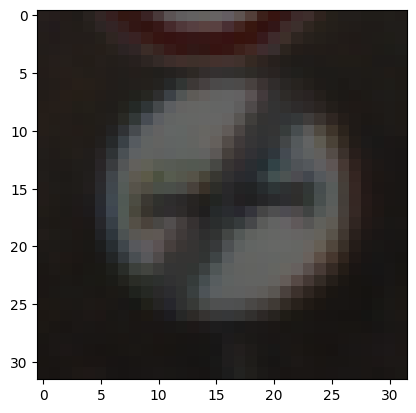

In [13]:
plt.imshow(trainX[16])

In [14]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [15]:
trainX=trainX.astype("float")/255.0
testX=testX.astype("float")/255.0
valX=valX.astype("float")/255.0

In [16]:
from sklearn.preprocessing import LabelBinarizer

In [17]:
lb =LabelBinarizer()

In [ ]:
trainY=lb.fit_transform(trainY)
valY=lb.fit_transform(valY)
testY=lb.fit_transform(testY)

# BUILD NEURONS NETWORK

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPool2D, Conv2D, Activation, Dropout, Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [20]:
model=Sequential()

In [21]:
w=32
h=32
classes=43
shape=[w,h,3]

In [22]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))

e:\machine_learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Activation("relu"))

In [24]:
model.add(BatchNormalization())

In [25]:
model.add(Conv2D(32,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [26]:
model.add(MaxPool2D(pool_size=(2,2)))

In [27]:
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [28]:
model.add(MaxPool2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(512))

In [31]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [32]:
model.add(Dense(43))

In [33]:
model.add(Activation("softmax"))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [35]:
aug=ImageDataGenerator(rotation_range=0.18,zoom_range=0.18,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [36]:
lr=0.01
epochs=10
batch_size=64

In [37]:
opt=SGD(learning_rate=lr,momentum=0.9)

In [38]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
print("start training")
H=model.fit(aug.flow(trainX,trainY,batch_size=batch_size),validation_data=(valX,valY),steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs,verbose=1)

start training
Epoch 1/10


e:\machine_learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 98s 175ms/step - accuracy: 0.3111 - loss: 2.5828 - val_accuracy: 0.5626 - val_loss: 1.4146
Epoch 2/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 1:45 195ms/step - accuracy: 0.7031 - loss: 1.0987

C:\Users\dungq\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7031 - loss: 1.0987 - val_accuracy: 0.5651 - val_loss: 1.4418
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 102s 188ms/step - accuracy: 0.7378 - loss: 0.8131 - val_accuracy: 0.7122 - val_loss: 0.9328
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7656 - loss: 0.6798 - val_accuracy: 0.7120 - val_loss: 0.9550
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 113s 207ms/step - accuracy: 0.8672 - loss: 0.3995 - val_accuracy: 0.7444 - val_loss: 0.9245
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9531 - loss: 0.1643 - val_accuracy: 0.7488 - val_loss: 0.9216
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 107s 196ms/step - accuracy: 0.9231 - loss: 0.2399 - val_accuracy: 0.8315 - val_loss: 0.6100
Epoch 8/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9219 - loss: 0.1797 - val_accuracy: 0.8290 - val_loss: 0.6223
Epoch 9/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 88s 161ms/step - accuracy: 0.9436 - loss: 0.1721 - val_accuracy

In [40]:
model.save("abcxyz.h5")

In [42]:
res_model=tf.keras.models.load_model("abcxyz.h5")

In [55]:
res=res_model.predict(testX[80:81])
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[9.1084529e-11, 1.1528430e-13, 4.6472698e-07, 3.5148667e-10,
        6.3568081e-11, 1.1701450e-09, 2.8309569e-10, 6.6396284e-11,
        1.2691753e-09, 6.4574994e-09, 2.3569463e-07, 8.0161975e-05,
        5.2765557e-12, 9.3234082e-14, 1.0929518e-10, 6.3982123e-12,
        4.6455973e-08, 1.9234723e-07, 1.1502569e-07, 1.4241526e-05,
        4.6994746e-06, 9.9485481e-01, 1.2898014e-09, 4.8509051e-04,
        3.7890160e-08, 3.4807783e-08, 5.9583556e-08, 2.5363076e-03,
        1.8598612e-03, 1.1832163e-08, 3.8903825e-05, 1.2432114e-04,
        9.2876581e-11, 6.9917503e-09, 1.9628148e-09, 3.7868805e-10,
        5.9224103e-10, 2.6946410e-08, 2.2648280e-10, 8.0060325e-08,
        3.8639371e-07, 5.5538298e-08, 2.0642752e-09]], dtype=float32)

In [44]:
import numpy as np

In [56]:
final=np.argmax(res)

In [57]:
final=classNames[final]

In [58]:
final

'Double curve'

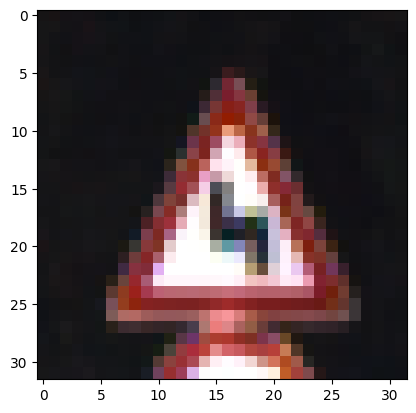

In [59]:
plt.imshow(test["features"][80])